# Tutorial: LabDataForester

Here is a quick demo tutorial of this model. 

You need:
1. A running database management system (DBMS), most likely on Neo4j Desktop
2. This iPython notebook, running at the base of the `labdataforester` repository

There is a little bit of work to do before step one...
- Download and install Neo4j Desktop Community Edition here: https://neo4j.com/deployment-center/#:~:text=Neo4j%20Desktop,to%20get%20started.
- Follow some more specific instructions here: https://wikis.mit.edu/confluence/display/KIPIT/Connecting+to+the+Knowledge+Graph

Once these things are set, this notebook will guide you through the example of loading the repository's filesystem into a knowledge graph for navigation.

## Surveying a FileTree

A quick and easy way to start is by running a quick surveying of this repository's file tree. Here, we use a simple custom schema to attach metadata to an indexed filesystem. 

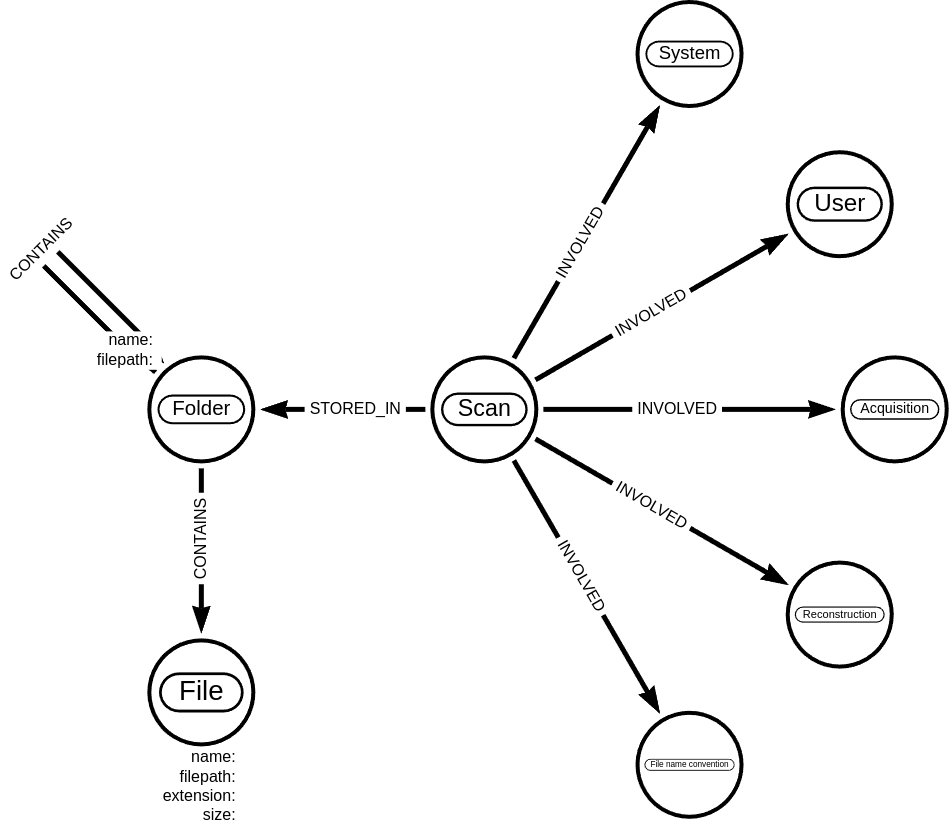

The above schema shows how this is done for MicroCT data, where the corresponding data files have sections with properties that are now taken as node labels in the graph database.

The following cell shows how we can choose the current directory to create a new FileTree object and survey the current directory and all of its nested contents

In [1]:
import labdataforester as ldf
from pathlib import Path


ft = ldf.survey.FileTree(Path('..').absolute())

if not ft.file_tree:
    ft.collect_file_tree()
    ft.build_file_path_index()
    ft.build_graph()

File path index built.
File tree graph built.


Once the directory and its nested elements are scanned, you can start viewing them at different levels

In [2]:
ft.list_all().sort_values(by='type', ascending=False)

,type,size,created,modified,metadata,filepath,name
5,folder,1144381,Tue May 28 12:34:43 2024,Tue May 28 12:34:43 2024,NaN,NaN,.git
6,folder,7050,Tue May 28 17:11:50 2024,Tue May 28 17:11:50 2024,NaN,NaN,.idea
7,folder,30993675,Tue May 28 12:28:30 2024,Tue May 28 12:28:22 2024,NaN,NaN,notebooks
8,folder,61504,Tue May 28 17:11:50 2024,Tue May 28 17:11:50 2024,NaN,NaN,labdataforester
9,folder,71639,Tue May 28 12:46:30 2024,Tue May 28 12:46:30 2024,NaN,NaN,.ipynb_checkpoints
10,folder,8386,Tue May 28 16:01:38 2024,Tue May 28 16:01:38 2024,NaN,NaN,apps
11,folder,0,Tue May 28 12:46:36 2024,Tue May 28 12:46:35 2024,NaN,NaN,test
4,.py,966,Tue May 28 12:14:33 2024,Tue May 28 12:14:33 2024,{},/home/patch/PycharmProjects/labdataforester/se...,setup.py
1,.md,345,Tue May 28 12:17:14 2024,Tue May 28 12:17:14 2024,{},/home/patch/PycharmProjects/labdataforester/RE...,README.md
3,.ipynb,202353,Tue May 28 17:10:16 2024,Tue May 28 17:10:16 2024,{},/home/patch/PycharmProjects/labdataforester/Tu...,Tutorial.ipynb


In [3]:
ft.list_all('notebooks')

,type,size,created,modified,metadata,filepath,name
0,.ipynb,458708,Tue May 28 12:28:22 2024,Wed May 15 11:26:37 2024,{},/home/patch/PycharmProjects/labdataforester/no...,MicroCT_Filetree_to_KG.ipynb
1,.ipynb,35253,Tue May 28 12:28:22 2024,Thu May 9 12:27:29 2024,{},/home/patch/PycharmProjects/labdataforester/no...,MicroCT_KG_Meta_Analysis.ipynb
2,.ipynb,9434,Tue May 28 12:28:22 2024,Tue May 14 15:43:05 2024,{},/home/patch/PycharmProjects/labdataforester/no...,CFT_Filetree_to_KG.ipynb
3,.ipynb,1938954,Tue May 28 12:28:22 2024,Tue May 21 12:08:21 2024,{},/home/patch/PycharmProjects/labdataforester/no...,FiletreeScan_microCT.ipynb
4,.ipynb,13144,Tue May 28 12:28:22 2024,Wed May 15 12:44:31 2024,{},/home/patch/PycharmProjects/labdataforester/no...,DICOM_Reader.ipynb
5,.ipynb,12517,Tue May 28 12:28:22 2024,Wed May 15 13:20:36 2024,{},/home/patch/PycharmProjects/labdataforester/no...,US_Filetree_to_KG.ipynb
6,.ipynb,7384,Tue May 28 12:28:22 2024,Tue May 28 11:46:16 2024,{},/home/patch/PycharmProjects/labdataforester/no...,Retrieve_Recon.ipynb
7,.ipynb,91845,Tue May 28 12:28:22 2024,Fri May 17 12:39:34 2024,{},/home/patch/PycharmProjects/labdataforester/no...,Filetree_Parse.ipynb
8,.ipynb,53661,Tue May 28 12:28:22 2024,Wed May 22 12:19:12 2024,{},/home/patch/PycharmProjects/labdataforester/no...,Filetree.ipynb
9,.ipynb,10686,Tue May 28 12:28:22 2024,Wed May 15 16:32:17 2024,{},/home/patch/PycharmProjects/labdataforester/no...,IVIS_Filetree_Parse.ipynb


In [4]:
ft.list_all('labdataforester/parse')

,type,size,created,modified,metadata,filepath,name
0,.py,2072,Tue May 28 12:28:43 2024,Wed May 15 13:01:25 2024,{},/home/patch/PycharmProjects/labdataforester/la...,dicom.py
1,.py,0,Tue May 28 12:28:43 2024,Thu May 16 14:03:13 2024,{},/home/patch/PycharmProjects/labdataforester/la...,ultrasound.py
2,.py,0,Tue May 28 12:28:43 2024,Thu May 16 14:03:05 2024,{},/home/patch/PycharmProjects/labdataforester/la...,mri.py
3,.py,0,Tue May 28 12:28:43 2024,Wed May 15 15:43:12 2024,{},/home/patch/PycharmProjects/labdataforester/la...,__init__.py
4,.py,0,Tue May 28 12:28:43 2024,Thu May 16 14:04:40 2024,{},/home/patch/PycharmProjects/labdataforester/la...,pet.py
5,.py,0,Tue May 28 12:28:43 2024,Thu May 16 14:03:46 2024,{},/home/patch/PycharmProjects/labdataforester/la...,cft.py
6,.py,2004,Tue May 28 12:28:43 2024,Wed May 15 16:33:19 2024,{},/home/patch/PycharmProjects/labdataforester/la...,ivis.py
7,.py,3164,Tue May 28 12:28:43 2024,Wed May 15 13:47:33 2024,{},/home/patch/PycharmProjects/labdataforester/la...,json.py
8,.py,0,Tue May 28 12:28:43 2024,Thu May 16 14:04:01 2024,{},/home/patch/PycharmProjects/labdataforester/la...,microct.py
9,.py,833,Tue May 28 12:28:43 2024,Wed May 15 12:36:09 2024,{},/home/patch/PycharmProjects/labdataforester/la...,log.py


In [5]:
ldf.store.configure_db(database='neo4j')

class_map, class_dict = ldf.model.build_classes(ft.graph)

try:
    node_map = ldf.store.push_to_neo4j(ft.graph, class_map)
except: 
    print(f"ERROR: {dir_name} filetree could not be loaded")


aenter called


Edges: 100%|████████████████████████████████████| 176/176 [00:00<00:00, 1993.60it/s]

aexit called
Graph loading complete!


### Viewing in Neo4j

Once this is loaded, you can scan the resulting database using the Neo4j suite.

Here is what the Folders and Files look like in Bloom's "Hierarchical layout" at the moment:

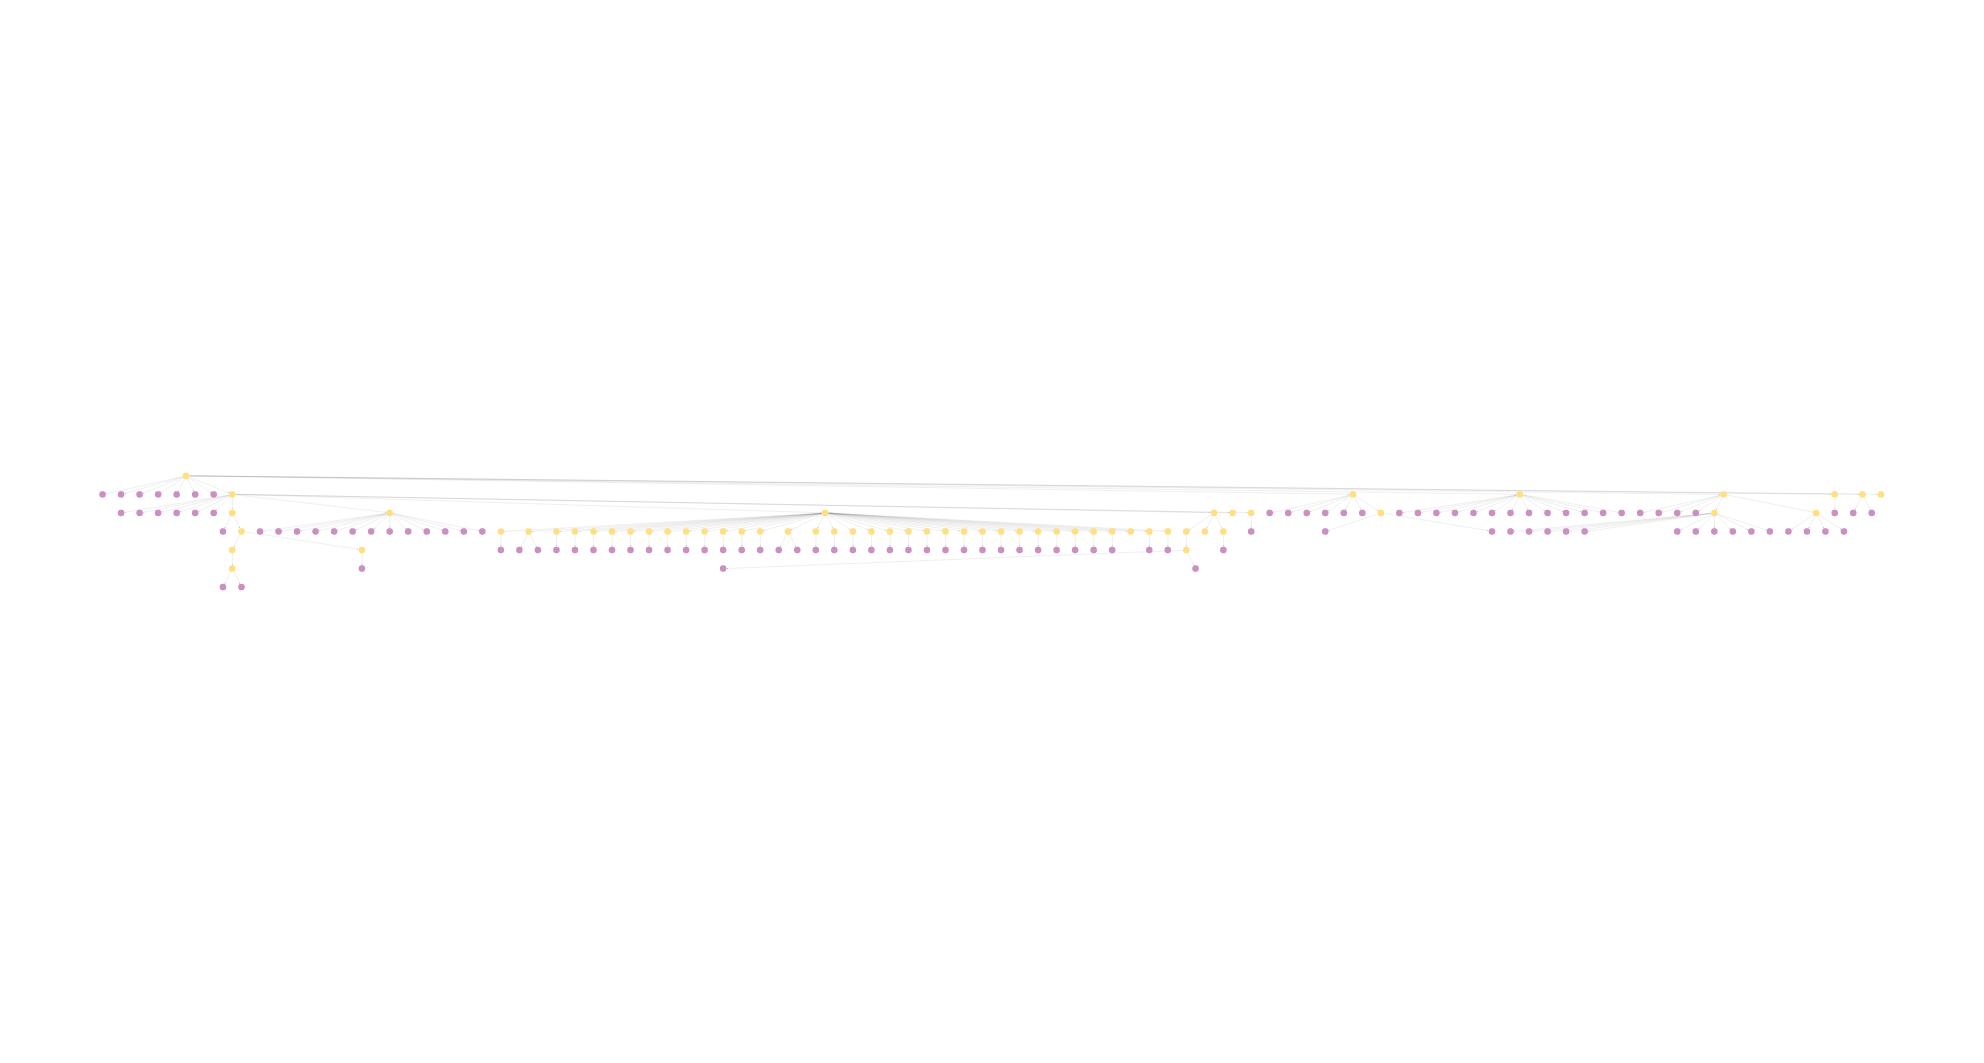

Use Neo4j to navigate to the database you have populated so you can try for yourself!